# Explore

In [3]:
# Import necessary libraries for data manipulation and visualization.
import numpy as np
import pandas as pd

# Import the 'nltk.sentiment' module
# using the Natural Language Toolkit (NLTK). Ensure NLTK is installed and configured properly.
import nltk.sentiment
import matplotlib.pyplot as plt

# Import 'wrangle' for data wrangling operations later in the code.
import wrangle

**Prep data**

In [4]:
# get data using the wrangle_glassdoor function
original_df, unicountvect,bicount_vect,tricount_vect = wrangle.wrangle_glassdoor()

In [5]:
# separate the origianal data in train validate and test for data exploration on train
train, val, test = original_df
train.head()

,pros,cons,name,rating,ceo_approval,recommended,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
url,,,,,,,,,,,,
https://www.glassdoor.com/Reviews/Alight-Solutions-Reviews-E1729719.htm,Company values you as an employee\nAlight is b...,High call volume sometimes during busy season\...,Alight Solutions,3.5,71.0,64.0,company values you as an employee\nalight is b...,company value employee alight far great compan...,high call volume sometimes during busy season\...,high call volume sometimes busy season larger ...,Three,3
https://www.glassdoor.com/Reviews/eBay-Reviews-E7853.htm,I never expected working at a large company to...,I haven't found any cons yet!\nAlthough the in...,eBay,4.1,84.0,80.0,i never expected working at a large company to...,never expected working large company like ever...,i haven ' t found any cons yet\nalthough the i...,' found con yet although initiative really foc...,Four,4
https://www.glassdoor.com/Reviews/Trane-Technologies-Reviews-E349.htm,"- Company is socially-minded and progressive, ...","- A few people are the over-promise, under-del...",Trane Technologies,3.9,81.0,75.0,company is sociallyminded and progressive whic...,company sociallyminded progressive make feel g...,a few people are the overpromise underdeliver ...,people overpromise underdeliver type thats unc...,Three,3
https://www.glassdoor.com/Reviews/Lenovo-Reviews-E8034.htm,"Awesome team, great job and experience.\nAs a ...",Can be subject to market volatility.\nFor thos...,Lenovo,4.0,91.0,78.0,awesome team great job and experience\nas a lo...,awesome team great job experience lower tier t...,can be subject to market volatility\nfor those...,subject market volatility north america workin...,Four,4
https://www.glassdoor.com/Reviews/SelfEmployed-com-Reviews-E5529631.htm,Make your own hours and fees\nFlexibility: You...,Business development is not my jam\nIncome Unc...,SelfEmployed.com,4.4,NaN,NaN,make your own hours and fees\nflexibility you ...,make hour fee flexibility freedom set schedule...,business development is not my jam\nincome unc...,business development jam income uncertainty in...,Four,4


**Trigram generator**

In [6]:
def generate_trigrams(lemmatized):
    words = lemmatized.split()
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            trigram = " ".join(words[i:i+3])
            trigrams.append(trigram)

    return trigrams

In [7]:
# Star ratings
bin_labels = ["Three", "Four"]

## 1. Are there differences in words distribution between different binned star rating categories?

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

### Pros Trigram

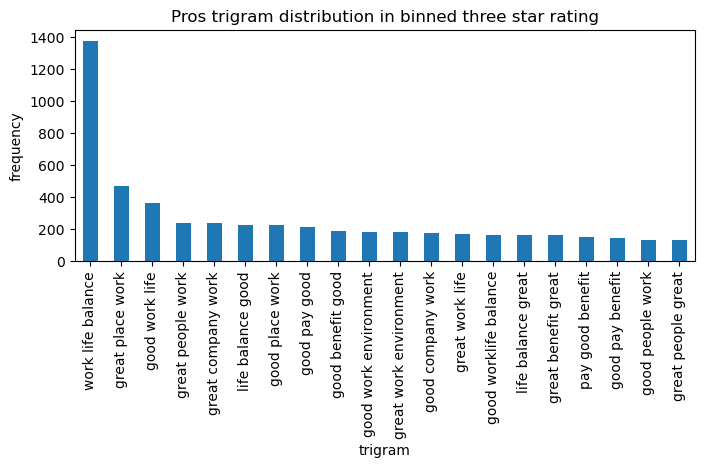

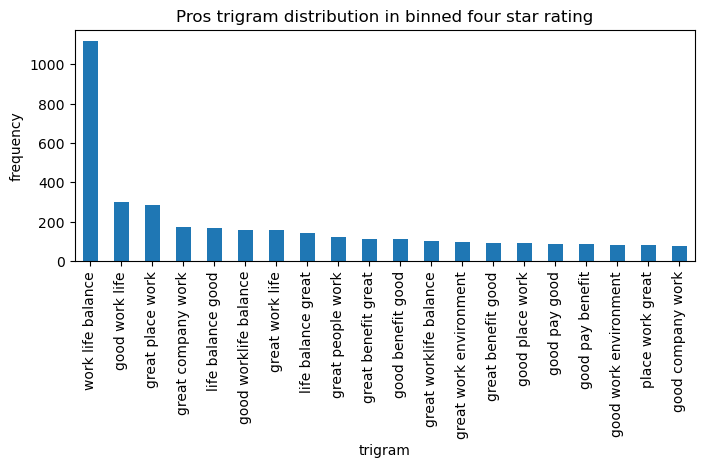

In [7]:
# Iterate over each bin label in 'bin_labels' - This likely represents different star rating categories.
for i in bin_labels:
    # Create a new figure for each bin label with specific dimensions for plotting.
    plt.figure(figsize=(8, 3))
    
    # Filter the 'pros' text data for the current bin label from the 'train' dataset.
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    
    # Generate trigrams from the lemmatized 'pros' text within the current bin.
    trigram = generate_trigrams(" ".join(bin_data.values))
    
    # Create a DataFrame from the generated trigrams.
    trigram_df = pd.DataFrame({'star_trigrams': trigram})
    
    # Calculate trigram counts and plot the top 20 most frequent trigrams as a bar chart.
    pd.Series(trigram_df['star_trigrams'].value_counts().head(20)).plot(kind="bar")
    
    # Set the title of the plot based on the current bin label.
    plt.title(f"Pros trigram distribution in binned {i.lower()} star rating")
    
    # Label the x-axis as 'trigram' and the y-axis as 'frequency'.
    plt.xlabel("trigram")
    plt.ylabel("frequency")
    
    # Display the current plot.
    plt.show()

### Cons trigram

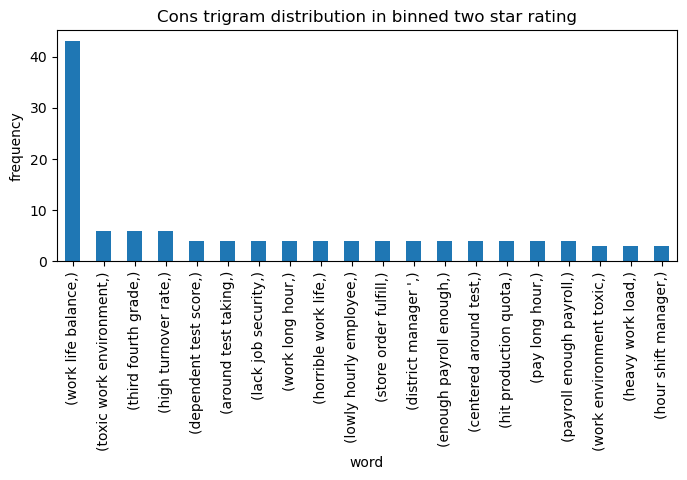

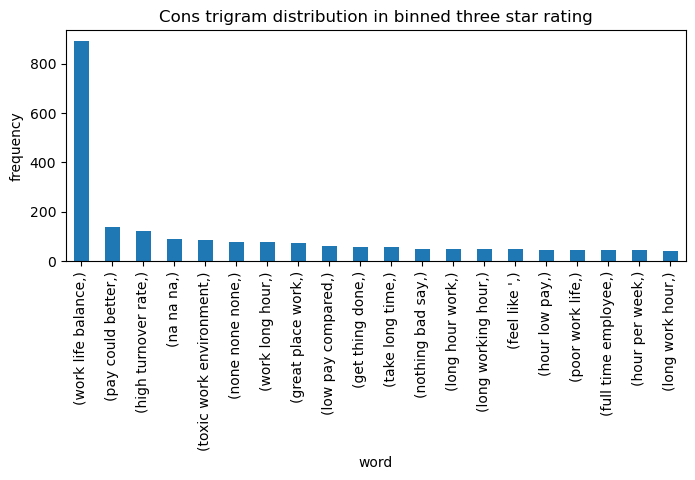

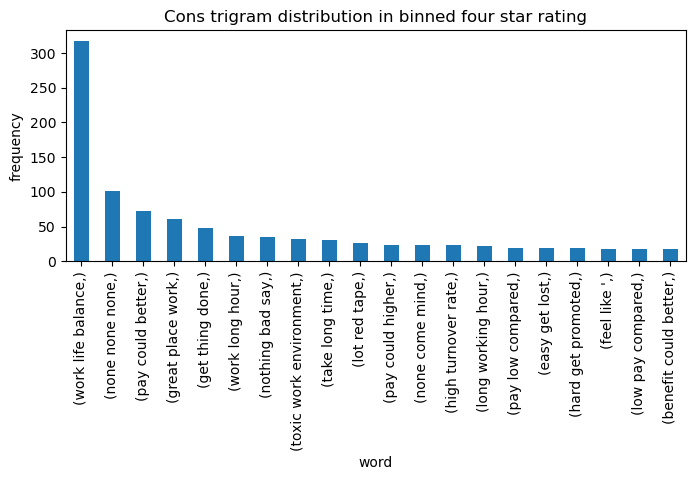

In [7]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    trigram = generate_trigrams(" ".join(bin_data.values))
    trigram_df = pd.DataFrame({'star_trigrams': trigram})
    
    
    # Calculate word counts
    pd.Series(trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Cons trigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

## 2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

In [8]:
# combine all the pros/cons revies as one string
pros_trigrams = generate_trigrams(" ".join(train.pros_lemmatized.values))
cons_trigrams = generate_trigrams(" ".join(train.cons_lemmatized.values))
# add list of trigrams to a dataframe
pros_trigrams = pd.DataFrame({'comb_pros_trigrams': pros_trigrams})
cons_trigrams = pd.DataFrame({'comb_cons_trigrams': cons_trigrams})
pros_trigrams.head(3)

,comb_pros_trigrams
0,company value employee
1,value employee alight
2,employee alight far


In [14]:
# use polarity_scores from that object
sia = nltk.sentiment.SentimentIntensityAnalyzer()
pros_trigrams["sentiment"] = pros_trigrams.comb_pros_trigrams.apply(lambda doc: sia.polarity_scores(doc)['compound'])
cons_trigrams["sentiment"] = cons_trigrams.comb_cons_trigrams.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [18]:
pros_trigrams.head(5)

,comb_pros_trigrams,sentiment
0,company value employee,0.3400
1,value employee alight,0.3400
2,employee alight far,0.0000
3,alight far great,0.6249
4,far great company,0.6249


In [19]:
cons_trigrams.head(5)

,comb_cons_trigrams,sentiment
0,high call volume,0.0
1,call volume sometimes,0.0
2,volume sometimes busy,0.0
3,sometimes busy season,0.0
4,busy season larger,0.0


### Pros trigram

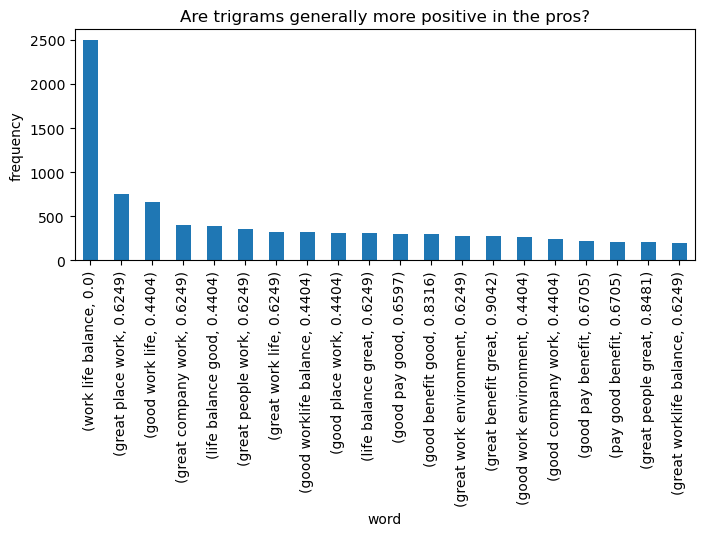

In [20]:
plt.figure(figsize=(8,3))
pd.Series(pros_trigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are trigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons trigram

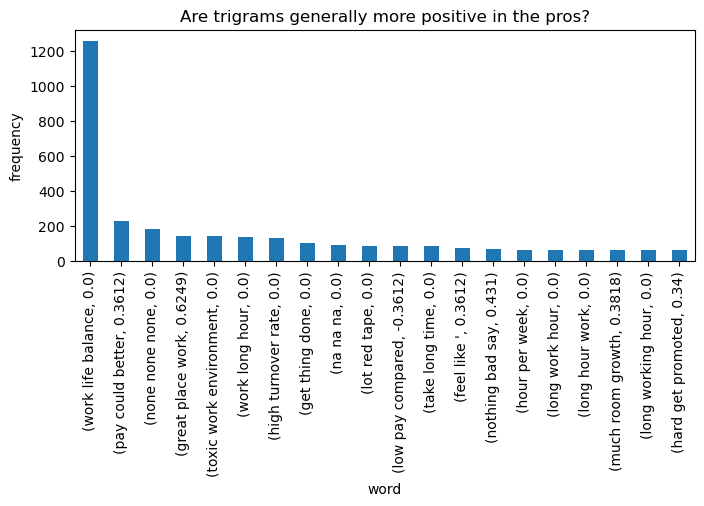

In [21]:
plt.figure(figsize=(8,3))
pd.Series(cons_trigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are trigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

## 3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

**Pros**

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

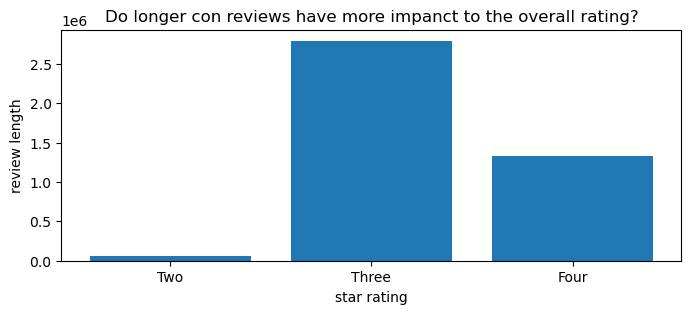

In [12]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer con reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

In [13]:
# Define bin edges
bin_edges = [2.0, 2.9, 3.9, 4.9]

# Define bin labels
bin_labels = ['Two', 'Three', 'Four']

# Bin the 'Values' column
train['binned_rating'] = pd.cut(train['rating'], bins=bin_edges, labels=bin_labels)
train.head(2)

,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
490,https://www.glassdoor.com/Reviews/Perficient-R...,Perficient is an ethical company that actually...,"None at all, love, love, love this company!\nI...",Perficient,4.1,perficient is an ethical company that actually...,perficient ethical company actually value empl...,none at all love love love this company\nit is...,none love love love company good company canno...,Four,4
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3


<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

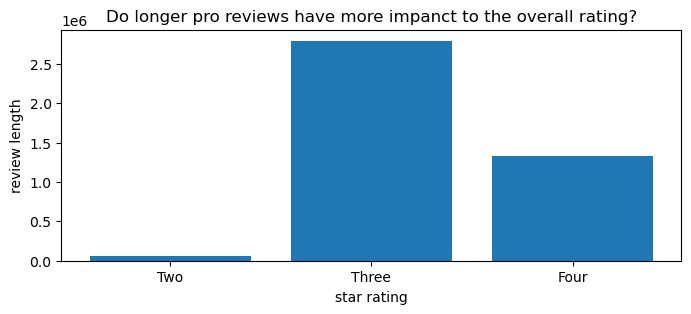

In [14]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

### Cons

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

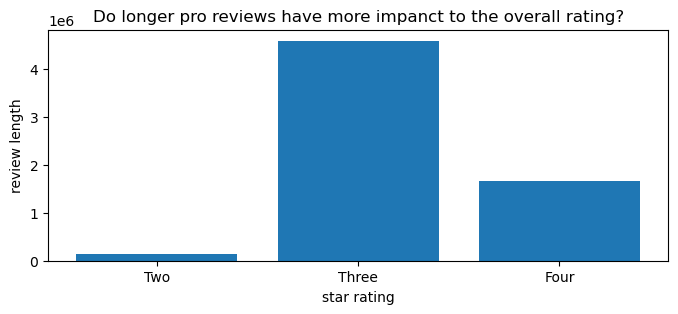

In [15]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

**Note**
- The count of three star rating is much higher than four star.

In [22]:
(train.binned_rating_int == 3).shape

(584,)

In [23]:
train[train.binned_rating_int == 4].shape

(177, 12)

## 4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

In [16]:
# Define bin labels
low_bin_labels = ['Two', 'Three', "Four"]
high_bin_labels = ['Four']

### Low stars and positive sentiment (Combined pros Trigram and cons Trigram for each star)

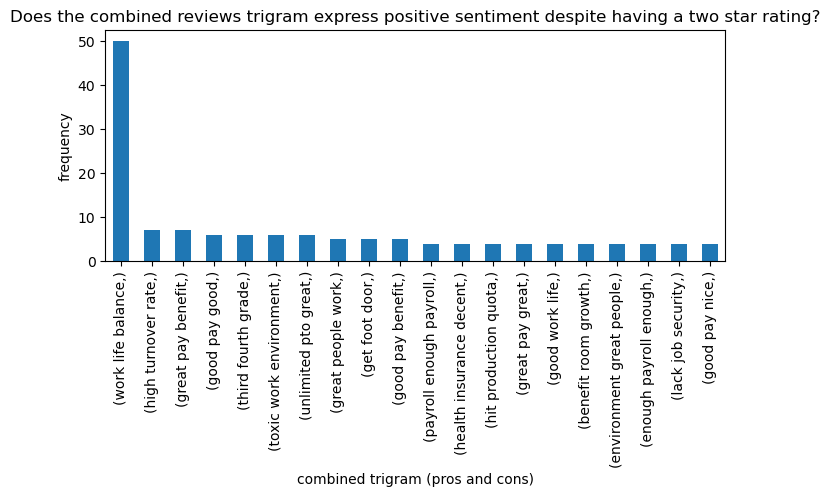

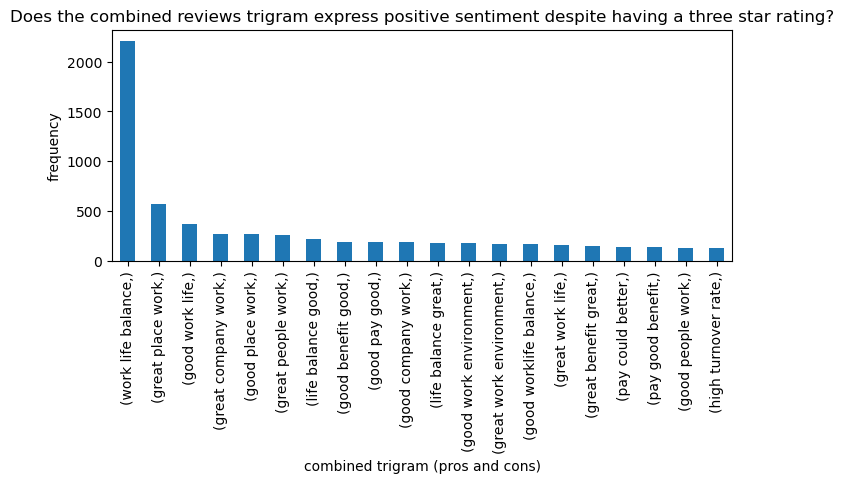

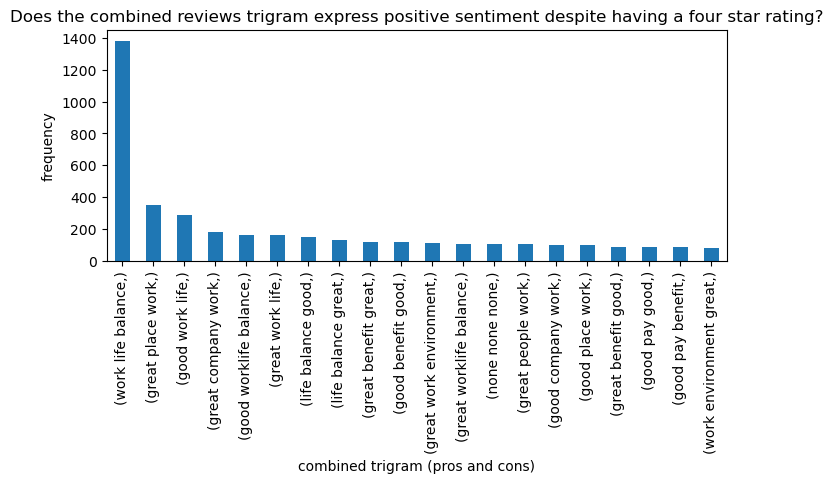

In [17]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    # split into trigrams
    pros_cons_trigram = generate_trigrams(pros_cons)
    pros_cons_trigram_df = pd.DataFrame({'pros cons Trigram': pros_cons_trigram})
    
    # Calculate word counts
    pd.Series(pros_cons_trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews trigram express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined trigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### high stars and negative sentiment (Combined pros Trigram and cons Trigram for each star)

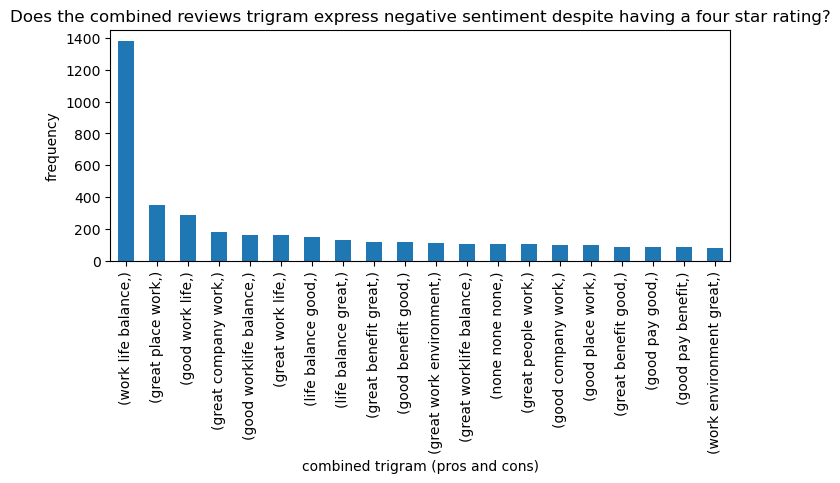

In [18]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    # split into trigrams
    pros_cons_trigram = generate_trigrams(pros_cons)
    pros_cons_trigram_df = pd.DataFrame({'pros cons trigram': pros_cons_trigram})
    
    # Calculate word counts
    pd.Series(pros_cons_trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews trigram express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined trigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

## 5. Are there any words that uniquely identify pros and cons?

### Pros trigram

In [19]:
# get the word frequencies for each category
pros_tri_freq = pd.Series(generate_trigrams(" ".join(train.pros_lemmatized.values))).value_counts()
cons_tri_freq = pd.Series(generate_trigrams(" ".join(train.cons_lemmatized.values))).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_tri_freq = pd.Series(generate_trigrams(pros_cons_str)).value_counts()
all_tri_freq

work life balance       3644
great place work         920
good work life           659
great company work       447
life balance good        372
                        ... 
training poor salary       1
poor salary internal       1
salary internal tool       1
internal tool work         1
employee well              1
Length: 1074427, dtype: int64

In [20]:
# concat all frequencies together into a dataframe
tri_word_freq= pd.concat([pros_tri_freq, cons_tri_freq, all_tri_freq], axis=1).fillna(0).astype(int)
tri_word_freq.columns = ['pros_tri_freq', 'cons_tri_freq', 'all_tri_freq']

tri_word_freq

,pros_tri_freq,cons_tri_freq,all_tri_freq
work life balance,2393,1251,3644
great place work,782,138,920
good work life,639,20,659
great company work,417,30,447
life balance good,362,10,372
...,...,...,...
environment thrive grow,0,1,1
goal time,0,1,0
timeperficient ethical company,0,0,1
unrealstic goal timeperficient,0,0,1


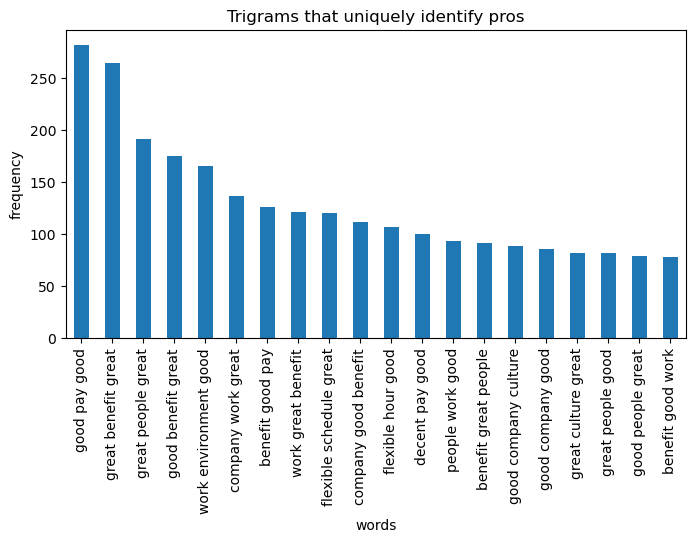

In [21]:
tri_word_freq.pros_tri_freq[tri_word_freq.cons_tri_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Trigrams that uniquely identify pros")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

### Cons trigram

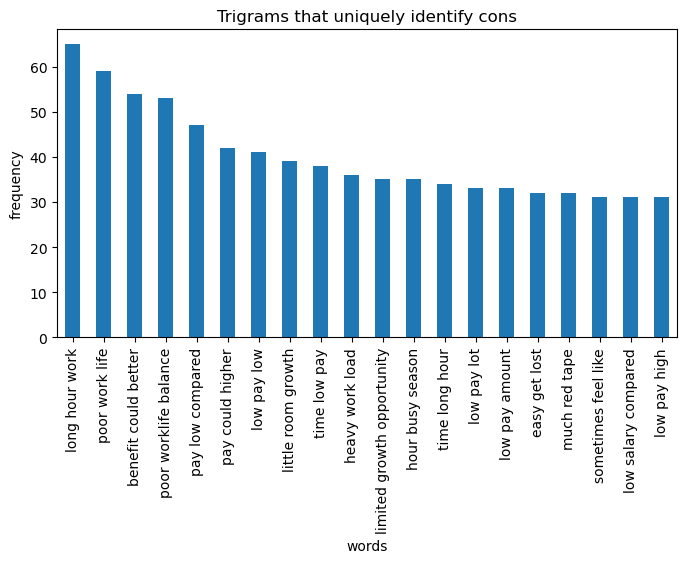

In [22]:
tri_word_freq.cons_tri_freq[tri_word_freq.pros_tri_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Trigrams that uniquely identify cons")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

### 6. What are the top words found in both pros and cons

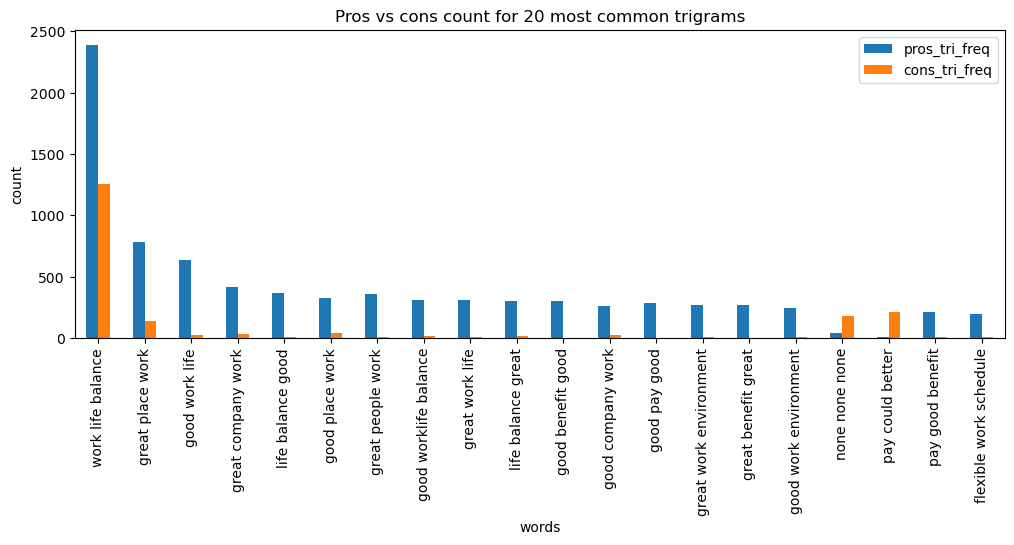

In [23]:
# plot most common words
tri_word_freq.sort_values('all_tri_freq', ascending=False)[['pros_tri_freq', 'cons_tri_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common trigrams")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

## Take aways

## With more time
- word count
- stopword count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio